In [24]:
# Standard useful data processing imports
import random
import numpy as np
import pandas as pd
# Visualisation imports
import matplotlib.pyplot as plt
# Scikit learn for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Keras Imports - CNN
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [25]:
import os
os.chdir("/Users/Dell/Desktop/Dataset")

In [26]:
#Loading the data
data = pd.read_csv("data.csv")

In [4]:
data.head(n=6)

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [5]:
data.groupby("character").count()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
character,,,,,,,,,,,,,,,,,,,,,
character_01_ka,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_02_kha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_03_ga,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_04_gha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_05_kna,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_06_cha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_07_chha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_08_ja,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_09_jha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000


# Preview characters in the dataset
Display one sample of each type of character in the dataset. This is a dataset of 36 consonants from the Devanagari script and numerals 0 through 9. There are 46 output classes. Each image is 32x32 pixels black and white (1 channel). Vowels are not seen in this dataset.

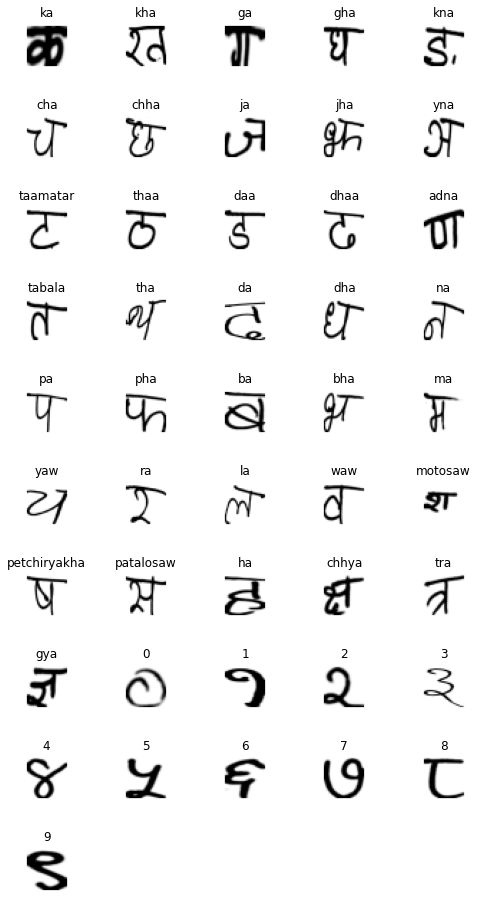

In [6]:

char_names = data.character.unique()   #print the character of each column uniquely
rows =10;columns=5;
fig, ax = plt.subplots(rows,columns, figsize=(8,16))
for row in range(rows):
    for col in range(columns):
        ax[row,col].set_axis_off()
        if columns*row+col < len(char_names):
            x = data[data.character==char_names[columns*row+col]].iloc[0,:-1].values.reshape(32,32)
            x = x.astype("float64")
            x/=255
            ax[row,col].imshow(x, cmap="binary")
            ax[row,col].set_title(char_names[columns*row+col].split("_")[-1])
            
plt.subplots_adjust(wspace=1, hspace=1)   
plt.show()

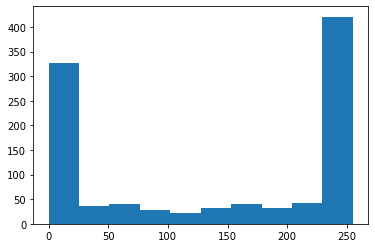

In [7]:
#Verifying the pixel distribution of any random character
import matplotlib.pyplot as plt
plt.hist(data.iloc[0,:-1])
plt.show()


In [27]:
X = data.values[:,:-1]/255.0
Y = data["character"].values

In [28]:
#Let us minimize the memory consumption
del data
n_classes = 46

In [44]:
# Let's split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
# Encode the categories
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = to_categorical(y_train, n_classes).astype('float32')
y_test = to_categorical(y_test, n_classes).astype('float32')

In [47]:
img_height_rows = 32
img_width_cols = 32

In [49]:
im_shape = (img_height_rows, img_width_cols, 1)
x_train = x_train.reshape(x_train.shape[0], *im_shape).astype('float32') 
x_test = x_test.reshape(x_test.shape[0], *im_shape).astype('float32') 

In [50]:
cnn = Sequential()

In [51]:
kernelSize = (3, 3)
ip_activation = 'relu'
ip_conv_0 = Convolution2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
cnn.add(ip_conv_0)

In [52]:
# Add the next Convolutional+Activation layer
ip_conv_0_1 = Convolution2D(filters=64, kernel_size=kernelSize, activation='relu')
cnn.add(ip_conv_0_1)

# Add the Pooling layer
pool_0 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_0)

In [53]:
ip_conv_1 = Convolution2D(filters=64, kernel_size=kernelSize, activation='relu')
cnn.add(ip_conv_1)
ip_conv_1_1 = Convolution2D(filters=64, kernel_size=kernelSize, activation='relu')
cnn.add(ip_conv_1_1)

pool_1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_1)

In [54]:
# Let's deactivate around 20% of neurons randomly for training
drop_layer_0 = Dropout(0.2)
cnn.add(drop_layer_0)

In [55]:
flat_layer_0 = Flatten()
cnn.add(Flatten())

In [56]:
# Now add the Dense layers
h_dense_0 = Dense(units=128, activation='relu', kernel_initializer='uniform')
cnn.add(h_dense_0)
# Let's add one more before proceeding to the output layer
h_dense_1 = Dense(units=64, activation='relu', kernel_initializer='uniform')
cnn.add(h_dense_1)

In [57]:
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation='softmax', kernel_initializer='uniform')
cnn.add(output_layer)

In [58]:

opt = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)


In [59]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)         

In [60]:
print(cnn.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)         

In [61]:
history = cnn.fit(x_train, y_train,
                  batch_size=32, epochs=10,
                  validation_data=(x_test, y_test))

Epoch 1/10
2013/2013 [==============================] - 157s 78ms/step - loss: 0.7108 - accuracy: 0.7926 - val_loss: 0.2059 - val_accuracy: 0.9367
Epoch 2/10
2013/2013 [==============================] - 155s 77ms/step - loss: 0.2014 - accuracy: 0.9366 - val_loss: 0.1701 - val_accuracy: 0.9479
Epoch 3/10
2013/2013 [==============================] - 161s 80ms/step - loss: 0.1300 - accuracy: 0.9599 - val_loss: 0.1108 - val_accuracy: 0.9671
Epoch 4/10
2013/2013 [==============================] - 175s 87ms/step - loss: 0.0988 - accuracy: 0.9689 - val_loss: 0.1043 - val_accuracy: 0.9702
Epoch 5/10
2013/2013 [==============================] - 173s 86ms/step - loss: 0.0795 - accuracy: 0.9748 - val_loss: 0.0964 - val_accuracy: 0.9732
Epoch 6/10
2013/2013 [==============================] - 163s 81ms/step - loss: 0.0651 - accuracy: 0.9793 - val_loss: 0.0807 - val_accuracy: 0.9780
Epoch 7/10
2013/2013 [==============================] - 177s 88ms/step - loss: 0.0560 - accuracy: 0.9820 - val_loss: 0

In [4]:
import matplotlib.pyplot as plt


In [5]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])


NameError: name 'history' is not defined

<Figure size 432x288 with 0 Axes>